# 03 - Interactive Viz

In [156]:
import pandas as pd
import numpy as np
import json
import folium

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # interface for statical data visualization
from IPython.display import display


1. Go to the eurostat website and try to find a dataset that includes the european unemployment rates at a recent date.



In [157]:
# database by theme/population and social conditions/labour market/
#employment and unemployment/LFS series - detailed annual survey results/Total unemployment/
#Unemployment rates by sex, age and citizen ship(%)

Use this data to build a Choropleth map which shows the unemployment rate in Europe at a country level. Think about the colors you use, how you decided to split the intervals into data classes or which interactions you could add in order to make the visualization intuitive and expressive. Compare Switzerland's unemployment rate to that of the rest of Europe.

In [158]:
def to_number(n):
    n = n.replace(',', '')
    n = n.replace('\'', '')
    return float(n)
# lire les données depuis un autre fichier
unemp_path = './lfsa_ugan/lfsa_ugan_1_Data.csv'
unemp_data = pd.read_csv(unemp_path) 
unemp_data['Value'] = unemp_data['Value'].apply(to_number)


In [159]:
m_europe = folium.Map([54,15], tiles='cartodbpositron', zoom_start=4)
topo_json_eu_path = './topojson/europe.topojson.json'
topo_json_eu = json.load(open(topo_json_eu_path))
folium.TopoJson(topo_json_eu,'objects.europe').add_to(m_europe) 
# attention c'était un topoJson et non un geoJson. Et il fallait spécifier le path de l'objet.
m_europe

# Chloropleth
m_europe.choropleth(geo_data = topo_json_eu,topojson = 'objects.europe', data=unemp_data,
             columns=['GEO','Value'], 
             key_on='feature.properties.NAME',
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2, legend_name = "unemployment rate (%)")
m_europe

## Question 3

In [160]:
# Swiss map

m_swiss = folium.Map([46.8182,8.2275], tiles = 'cartodbpositron', zoom_start=7.5)
geo_json_swiss_path = './topojson/ch-cantons.topojson.json'
geo_json_swiss = json.load(open(geo_json_swiss_path))
folium.TopoJson(geo_json_swiss,'objects.cantons').add_to(m_swiss) 

In [161]:
swiss_unemp_path = '2_1 Taux de chômage.csv'
swiss_unemp_data = pd.read_csv(swiss_unemp_path, encoding='utf_16') 
swiss_unemp_data = swiss_unemp_data[['Canton', 'Nationalité', 'Taux de chômage']]

swiss_unemp_data

,Canton,Nationalité,Taux de chômage
0,ZH,Etrangers,5.3
1,ZH,Suisses,2.5
2,BE,Etrangers,5.5
3,BE,Suisses,1.8
4,LU,Etrangers,3.9
5,LU,Suisses,1.3
6,UR,Etrangers,2.1
7,UR,Suisses,0.4
8,SZ,Etrangers,3.4
9,SZ,Suisses,1.2


In [162]:
a = swiss_unemp_data.groupby(['Canton']).aggregate(np.diff).reset_index()
a['Taux de chômage'] = a['Taux de chômage'].apply(np.abs)
a

,Canton,Taux de chômage
0,AG,3.5
1,AI,1.5
2,AR,2.0
3,BE,3.7
4,BL,2.6
5,BS,1.8
6,FR,3.0
7,GE,0.9
8,GL,2.0
9,GR,1.6


In [163]:
# Chloropleth
m_swiss.choropleth(geo_data = geo_json_swiss,topojson = 'objects.cantons', data=a,
             columns=['Canton','Taux de chômage'], 
             key_on='feature.id',
             fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2, legend_name = "difference between foreign and national unemployment rate")
m_swiss

In [164]:
swiss_unemp_age_path = '1_1 Chômeurs et demandeurs d_emploi selon divers critères.csv'
swiss_unemp_age_data = pd.read_csv(swiss_unemp_age_path, encoding='utf_16') 
swiss_unemp_age_data = swiss_unemp_age_data[['Canton', 'Nationalité', 'Classe', 'Chômeurs inscrits']]
swiss_unemp_age_data['Chômeurs inscrits'] = swiss_unemp_age_data['Chômeurs inscrits'].apply(to_number)
swiss_unemp_age_data = swiss_unemp_age_data[swiss_unemp_age_data['Nationalité'] != 'Total'].reset_index()

In [165]:
swiss_unemp_age_data

,index,Canton,Nationalité,Classe,Chômeurs inscrits
0,0,Zurich,Etrangers,1,1015.0
1,1,Zurich,Etrangers,2,8846.0
2,2,Zurich,Etrangers,3,2250.0
3,3,Zurich,Etrangers,Total,12111.0
4,4,Zurich,Suisses,1,2405.0
5,5,Zurich,Suisses,2,8207.0
6,6,Zurich,Suisses,3,4502.0
7,7,Zurich,Suisses,Total,15114.0
8,9,Berne,Etrangers,1,597.0
9,10,Berne,Etrangers,2,3316.0


In [166]:
total = swiss_unemp_age_data[swiss_unemp_age_data.Classe == 'Total']
total = total['Chômeurs inscrits']
total

3      12111.0
7      15114.0
11      4900.0
15      8758.0
19      1593.0
23      2292.0
27        53.0
31        59.0
35       617.0
39       838.0
43        68.0
47        85.0
51        94.0
55       154.0
59       184.0
63       232.0
67       717.0
71       826.0
75      1888.0
79      2578.0
83      1569.0
87      2232.0
91      1780.0
95      1675.0
99      1596.0
103     2486.0
107      595.0
111      691.0
115      179.0
119      344.0
123       23.0
127       39.0
131     2902.0
135     3225.0
139      527.0
143      639.0
147     4972.0
151     5712.0
155     1475.0
159     1583.0
163     2303.0
167     2899.0
171     8264.0
175     8891.0
179     2126.0
183     2690.0
187     1970.0
191     2768.0
195     5942.0
199     6292.0
203      505.0
207     1114.0
Name: Chômeurs inscrits, dtype: float64

In [167]:
total2 = pd.Series([])

for row in total:
    for index in range(4):
        to_append = pd.Series([row])
        total2 = total2.append(to_append, ignore_index=True)
total2

0      12111.0
1      12111.0
2      12111.0
3      12111.0
4      15114.0
5      15114.0
6      15114.0
7      15114.0
8       4900.0
9       4900.0
10      4900.0
11      4900.0
12      8758.0
13      8758.0
14      8758.0
15      8758.0
16      1593.0
17      1593.0
18      1593.0
19      1593.0
20      2292.0
21      2292.0
22      2292.0
23      2292.0
24        53.0
25        53.0
26        53.0
27        53.0
28        59.0
29        59.0
        ...   
178     2126.0
179     2126.0
180     2690.0
181     2690.0
182     2690.0
183     2690.0
184     1970.0
185     1970.0
186     1970.0
187     1970.0
188     2768.0
189     2768.0
190     2768.0
191     2768.0
192     5942.0
193     5942.0
194     5942.0
195     5942.0
196     6292.0
197     6292.0
198     6292.0
199     6292.0
200      505.0
201      505.0
202      505.0
203      505.0
204     1114.0
205     1114.0
206     1114.0
207     1114.0
Length: 208, dtype: float64

In [168]:
swiss_unemp_age_data['Total'] = total2
swiss_unemp_age_data['Ratio'] = swiss_unemp_age_data['Chômeurs inscrits']/swiss_unemp_age_data['Total']*100
swiss_unemp_age_data = swiss_unemp_age_data[['Canton', 'Nationalité', 'Classe', 'Ratio']]
swiss_unemp_age_data = swiss_unemp_age_data[(swiss_unemp_age_data['Classe'] != 'Total') & 
                                            (swiss_unemp_age_data['Canton'] != 'Total')]

In [169]:
swiss_unemp_age_data

,Canton,Nationalité,Classe,Ratio
0,Zurich,Etrangers,1,8.380811
1,Zurich,Etrangers,2,73.041037
2,Zurich,Etrangers,3,18.578152
4,Zurich,Suisses,1,15.912399
5,Zurich,Suisses,2,54.300648
6,Zurich,Suisses,3,29.786952
8,Berne,Etrangers,1,12.183673
9,Berne,Etrangers,2,67.673469
10,Berne,Etrangers,3,20.142857
12,Berne,Suisses,1,16.053894


In [170]:
swiss_unemp_age_data[(swiss_unemp_age_data['Nationalité'] == 'Suisses') & 
                              (swiss_unemp_age_data['Classe'] == '3')]['Ratio'].tolist()

[29.786952494376074,
 33.055492121488925,
 32.24258289703316,
 35.59322033898305,
 40.572792362768496,
 43.529411764705884,
 47.4025974025974,
 38.362068965517246,
 35.83535108958838,
 30.56633048875097,
 36.0663082437276,
 27.164179104477608,
 34.47304907481899,
 29.81186685962373,
 43.31395348837209,
 38.46153846153847,
 32.15503875968992,
 34.58528951486698,
 34.34873949579832,
 32.91219204042957,
 29.492928596067607,
 27.094814981441907,
 29.107806691449817,
 28.2514450867052,
 25.57215511760966,
 31.05924596050269]

In [171]:
swiss_unemp_age_data['Canton'].drop_duplicates().tolist()

['Zurich',
 'Berne',
 'Lucerne',
 'Uri',
 'Schwyz',
 'Obwald',
 'Nidwald',
 'Glaris',
 'Zoug',
 'Fribourg',
 'Soleure',
 'Bâle-Ville',
 'Bâle-Campagne',
 'Schaffhouse',
 'Appenzell Rhodes-Extérieures',
 'Appenzell Rhodes-Intérieures',
 'St-Gall',
 'Grisons',
 'Argovie',
 'Thurgovie',
 'Tessin',
 'Vaud',
 'Valais',
 'Neuchâtel',
 'Genève',
 'Jura']

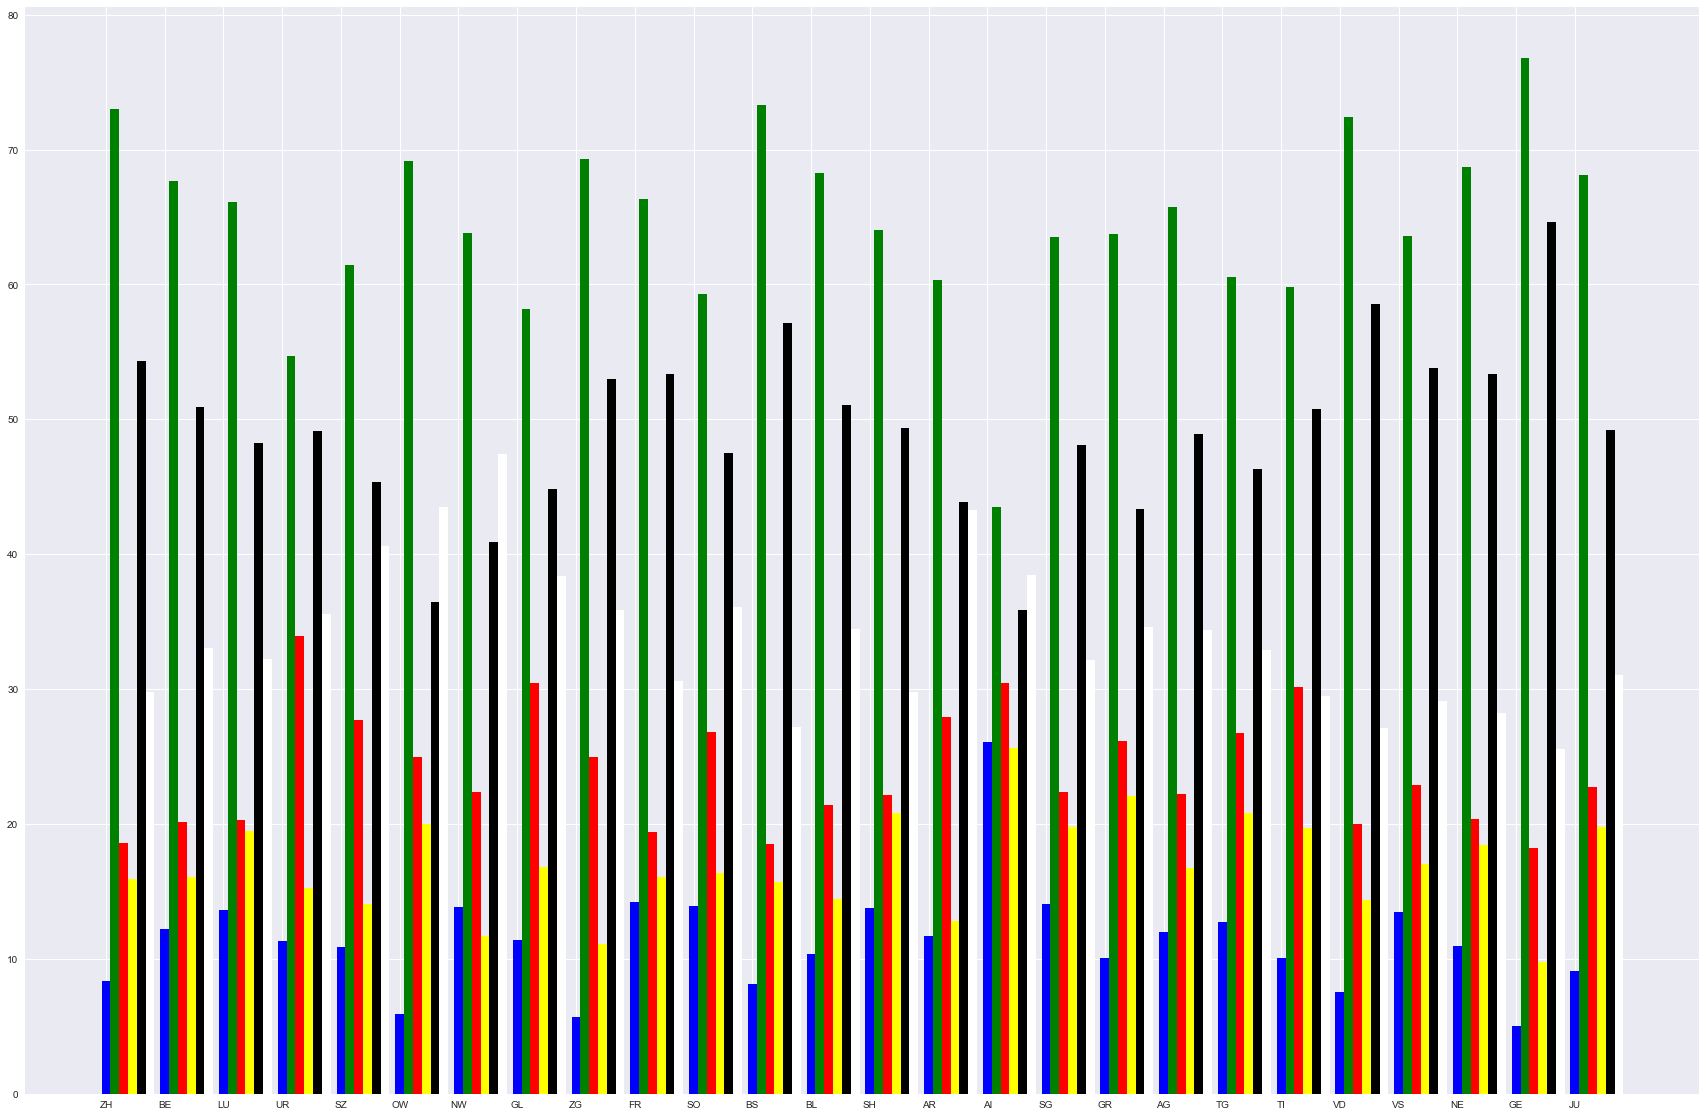

In [176]:
xlabel = swiss_unemp_data['Canton'].drop_duplicates().tolist()
group1 = swiss_unemp_age_data[(swiss_unemp_age_data['Nationalité'] == 'Etrangers') & 
                              (swiss_unemp_age_data['Classe'] == '1')]['Ratio'].tolist()
group2 = swiss_unemp_age_data[(swiss_unemp_age_data['Nationalité'] == 'Etrangers') & 
                              (swiss_unemp_age_data['Classe'] == '2')]['Ratio'].tolist()
group3 = swiss_unemp_age_data[(swiss_unemp_age_data['Nationalité'] == 'Etrangers') & 
                              (swiss_unemp_age_data['Classe'] == '3')]['Ratio'].tolist()
group4 = swiss_unemp_age_data[(swiss_unemp_age_data['Nationalité'] == 'Suisses') & 
                              (swiss_unemp_age_data['Classe'] == '1')]['Ratio'].tolist()
group5 = swiss_unemp_age_data[(swiss_unemp_age_data['Nationalité'] == 'Suisses') & 
                              (swiss_unemp_age_data['Classe'] == '2')]['Ratio'].tolist()
group6 = swiss_unemp_age_data[(swiss_unemp_age_data['Nationalité'] == 'Suisses') & 
                              (swiss_unemp_age_data['Classe'] == '3')]['Ratio'].tolist()

fig, ax = plt.subplots(figsize=(30, 20))

x = np.arange(52, step=2)
w = 0.3
ax.bar(x, group1,width=w,color='blue')
ax.bar(x+w, group2,width=w,color='green')
ax.bar(x+2*w, group3,width=w,color='red')
ax.bar(x+3*w, group4,width=w,color='yellow')
ax.bar(x+4*w, group5,width=w,color='black')
ax.bar(x+5*w, group6,width=w,color='white')
plt.xticks(x, xlabel)
ax.autoscale(tight=False)
plt.show()

In [ ]:
xlabel